# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import warnings

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import recall_score, precision_score,accuracy_score, average_precision_score, f1_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours

import xgboost as xgb
import shap

import lime
from lime import lime_tabular

from functions import *

# Read dataset

In [23]:
data = pd.read_csv('Assets\Datasets\df_preprocessed.csv', delimiter=',')

symptom_columns = data.iloc[:,:-1].columns.tolist()

# Extract the feature matrix (X) and the target vector (y)
X = data[symptom_columns]
y = data['Test_Result'].to_numpy()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.75      0.83     16437
           1       0.29      0.60      0.39      2725

    accuracy                           0.73     19162
   macro avg       0.60      0.68      0.61     19162
weighted avg       0.83      0.73      0.77     19162



<Figure size 640x480 with 0 Axes>

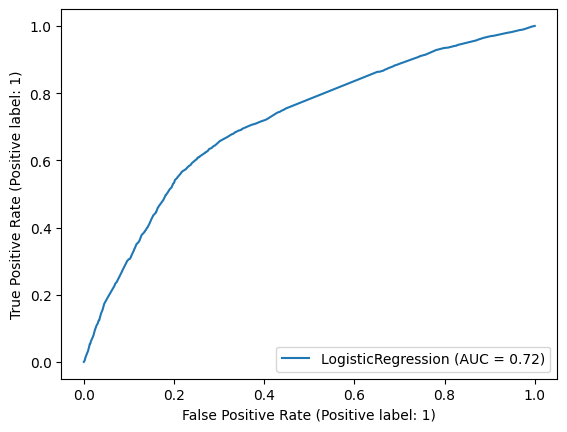

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

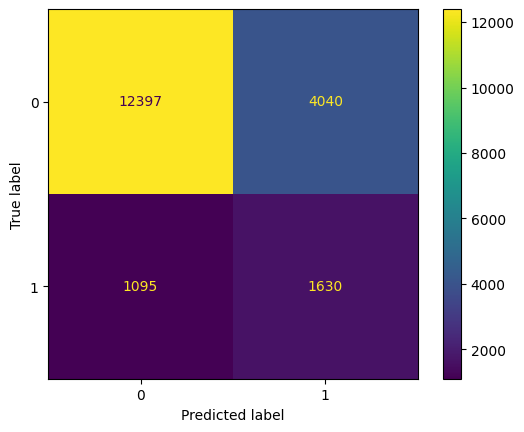


               variable  coefficient  odds ratio  Lower CI  Upper CI
1                 Fever     0.542285    1.719933  1.678193  1.762711
2                 Cough     0.255677    1.291335  1.261157  1.322236
3           Sore_Throat    -0.395257    0.673507  0.658231  0.689137
4            Runny_Nose    -0.180517    0.834838  0.815168  0.854984
5               Myalgia     0.289535    1.335806  1.304745  1.367606
6                Nausea     0.110099    1.116389  1.083265  1.150526
7              Diarrhea    -0.019391    0.980796  0.956998  1.005185
8         Loss_of_Smell     1.381709    3.981700  3.883822  4.082045
9   Shortness_of_Breath     0.427478    1.533386  1.416069  1.660422
10           NA_Symptom     0.198899    1.220058  1.177492  1.264163



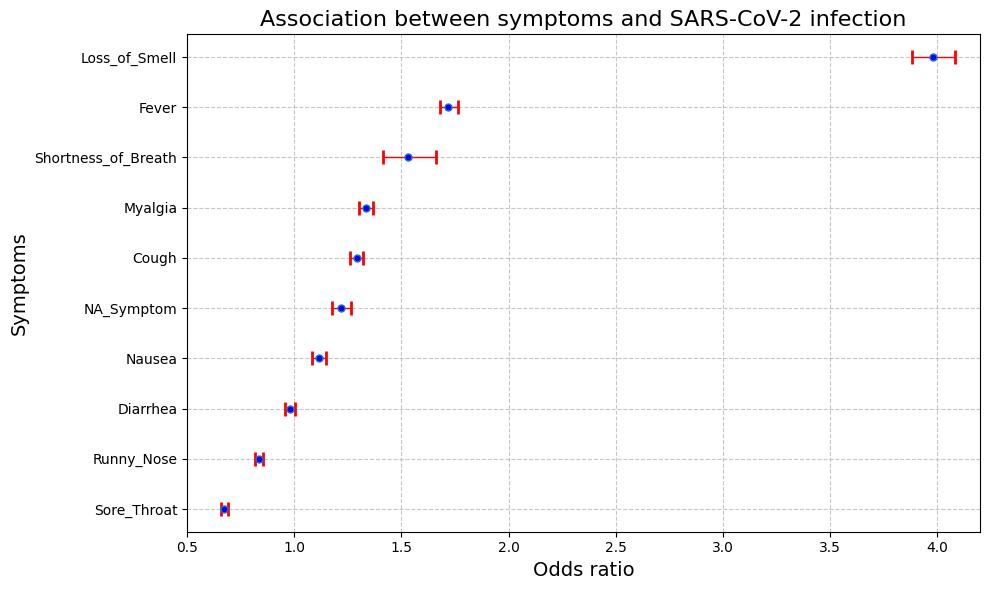

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_LR = LogisticRegression(class_weight='balanced', max_iter=1000)

clf_LR,X_train_LR, X_test_LR, y_train_LR, y_test_LR, y_pred_LR = metrics_ML(clf_LR, X_train, X_test, y_train, y_test)

# Calculate Odds ratios and confidence intervals
odds_ratio_ML, lowerCI, upperCI = calculate_coefficients_and_intervals(clf_LR, X_train_LR, symptom_columns)

# Plot the odds ratios with confidence intervals
lista_odds_ratio_sintomas = list(odds_ratio_ML)
plot_odds_ratios(lista_odds_ratio_sintomas, symptom_columns, lowerCI, upperCI)

### SHAP and LIME

---------------SHAP--------------------


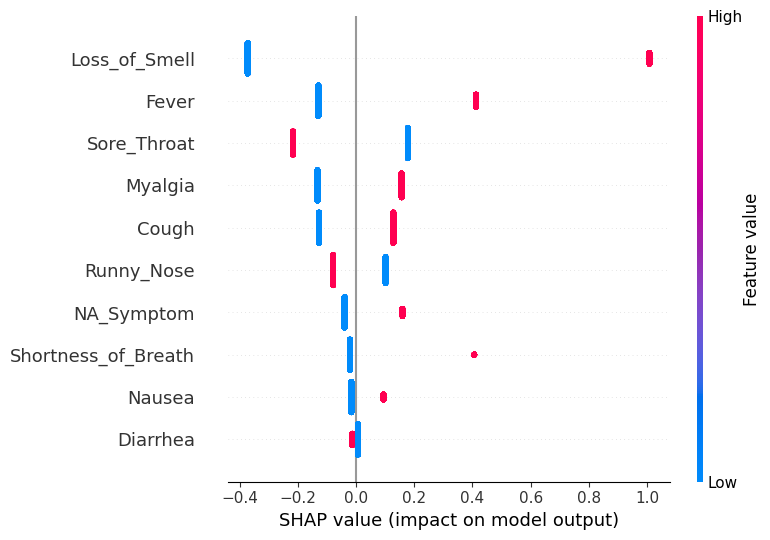


Feature importance :  [0.21170463 0.12783835 0.1949698  0.08938693 0.14338582 0.02756335
 0.00801162 0.54179256 0.02838107 0.06257385]


<Figure size 640x480 with 0 Axes>

In [26]:
Imp_shap_RL = SHAP_LINEAR(clf_LR, X_train_LR, X_test_LR,symptom_columns)


---------------LIME--------------------



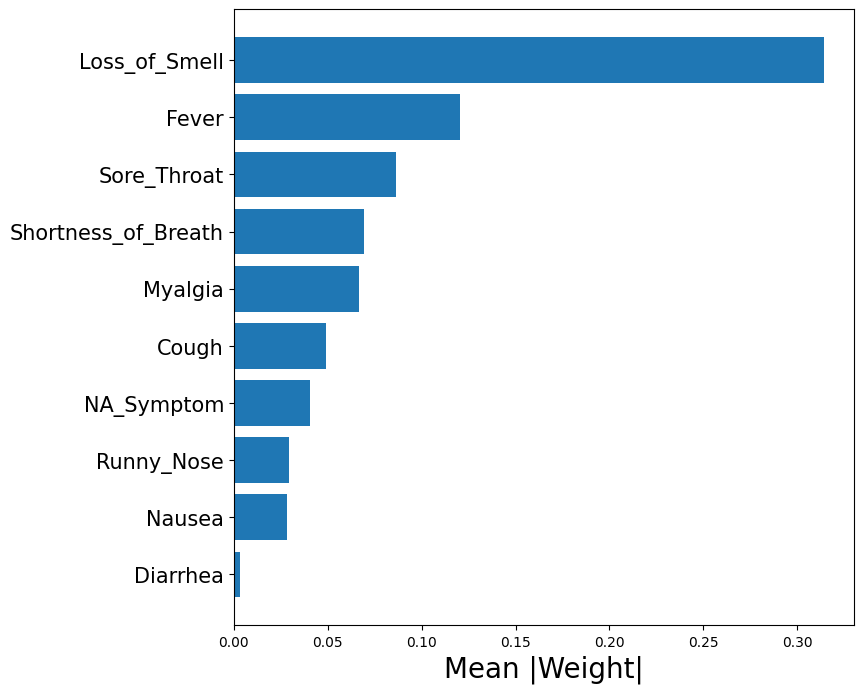

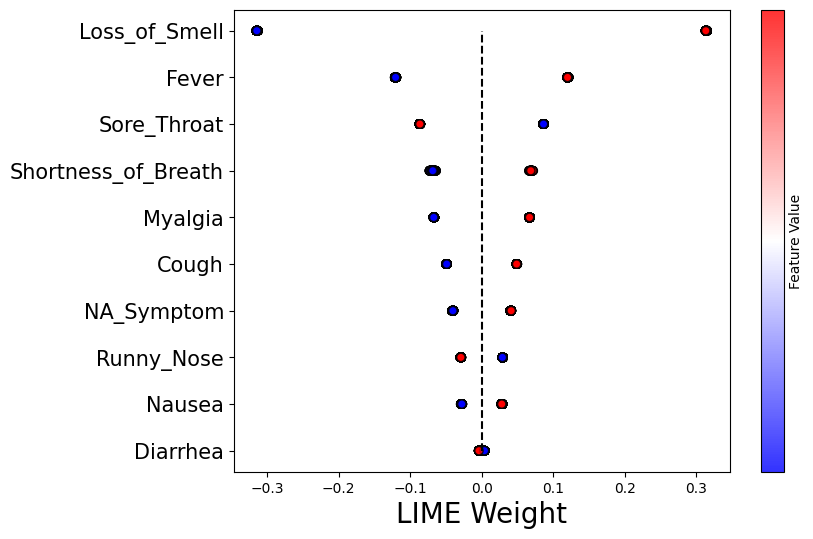

In [50]:
LIME(clf_LR, X_train_LR)

# Random Forest

              precision    recall  f1-score   support

           0       0.93      0.73      0.81     16542
           1       0.27      0.63      0.38      2620

    accuracy                           0.71     19162
   macro avg       0.60      0.68      0.60     19162
weighted avg       0.84      0.71      0.75     19162



<Figure size 640x480 with 0 Axes>

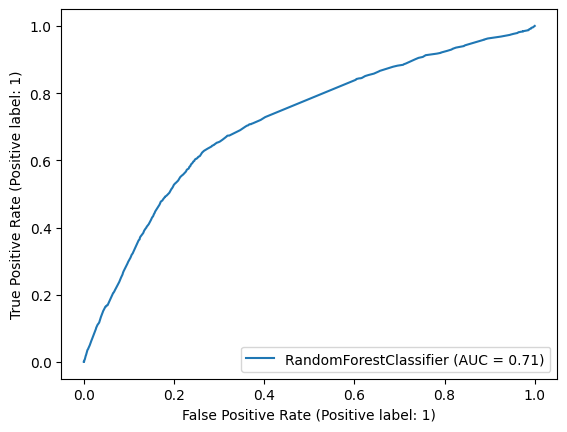

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

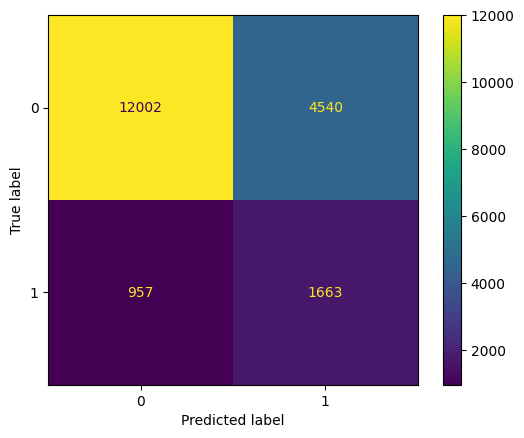

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

#clf_RF = RandomForestClassifier(bootstrap = True, max_depth= 80, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250, class_weight='balanced')
clf_RF = RandomForestClassifier(bootstrap = True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50,class_weight='balanced')
#clf = RandomForestClassifier()

clf_RF, X_train_RF, X_test_RF, y_train_RF, y_test_RF, y_pred_RF = metrics_ML(clf_RF, X_train, X_test, y_train, y_test)

### SHAP

---------------SHAP--------------------


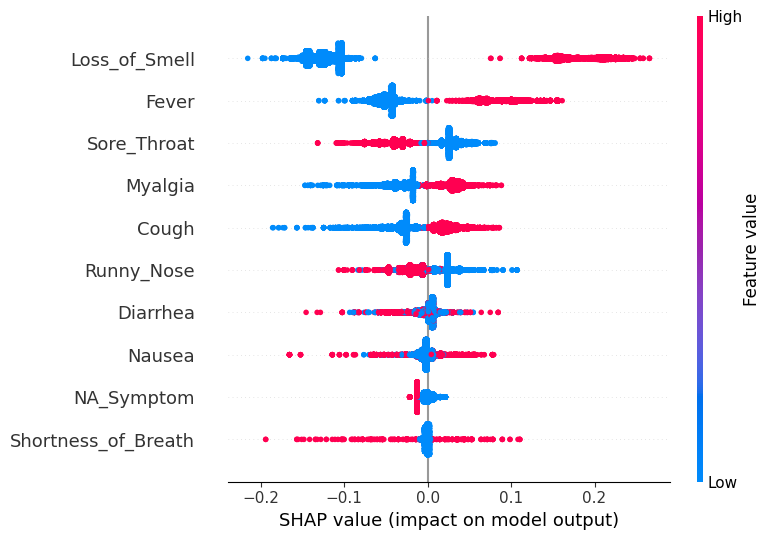


Feature importance :  [0.05893875 0.02854129 0.03631665 0.0211661  0.03101653 0.00728447
 0.00878343 0.13896334 0.00206594 0.00517649]


<Figure size 640x480 with 0 Axes>

In [4]:
label = data.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]
features=label[selected_features]

Imp_shap_RF = SHAP(clf_RF, X_test_RF, features)

### LIME


---------------LIME--------------------



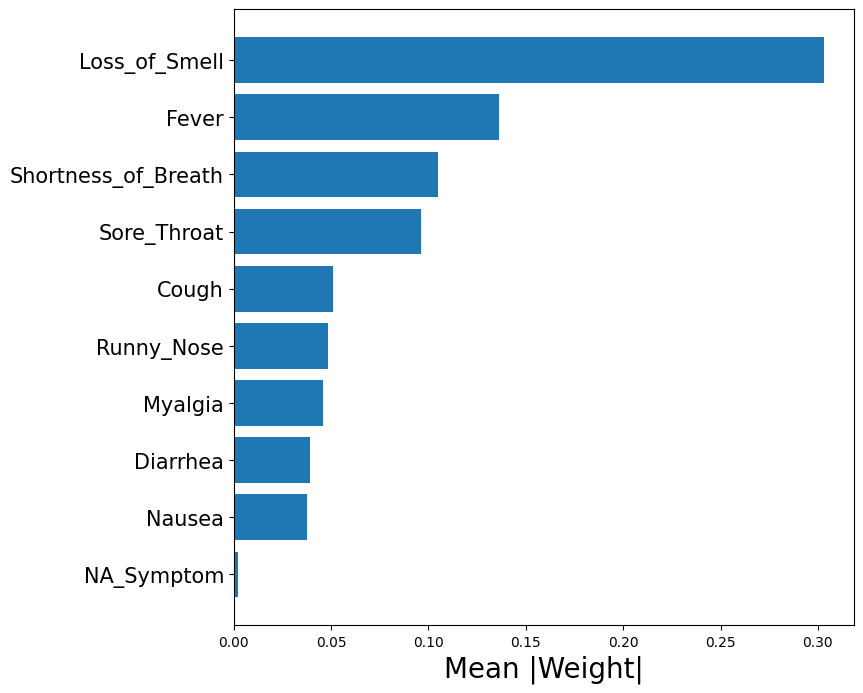

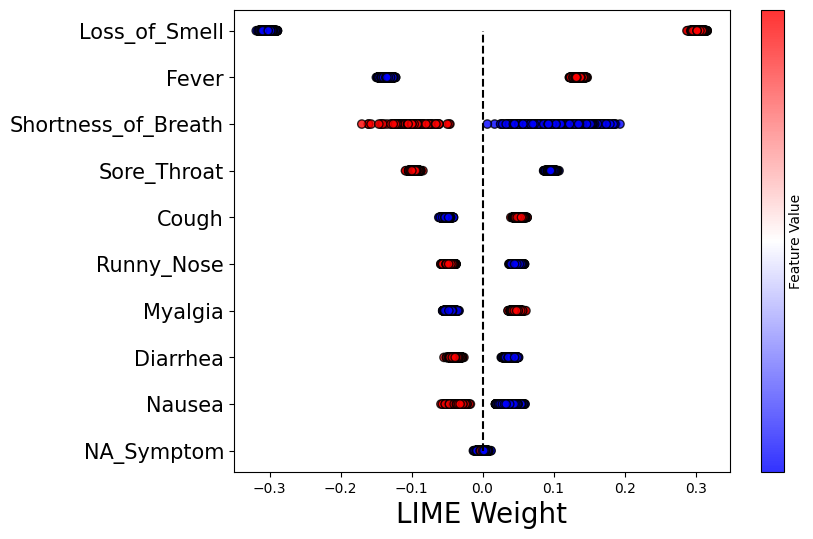

In [7]:
LIME(clf_RF, X_train_RF,symptom_columns,X)

# Xgboost

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11545
           1       0.96      0.43      0.59      2788

    accuracy                           0.89     14333
   macro avg       0.92      0.71      0.76     14333
weighted avg       0.89      0.89      0.87     14333



<Figure size 640x480 with 0 Axes>

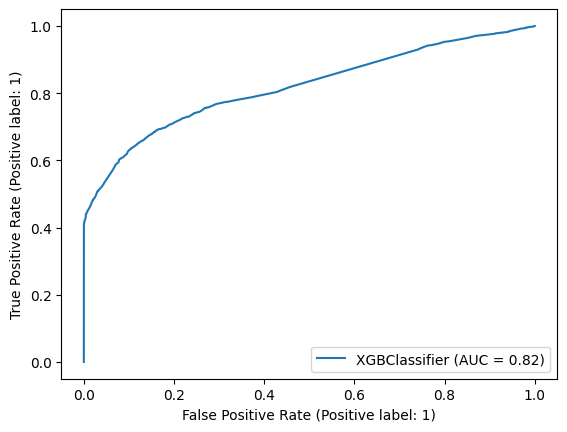

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

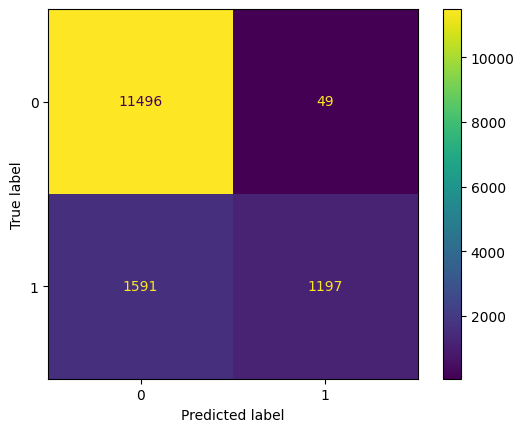

In [9]:
enn = EditedNearestNeighbours(kind_sel="all")
X_enn, y_enn = enn.fit_resample(X, y) #undersampling

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enn, y_enn, test_size=0.3)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_xgb = xgb.XGBClassifier(n_estimators = 300, subsample = 0.99, learning_rate=0.05,colsample_bytree=1, random_state=137)

clf_xgb, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, y_pred_xgb  = metrics_ML(clf_xgb, X_train, X_test, y_train, y_test)

### SHAP 

---------------SHAP--------------------


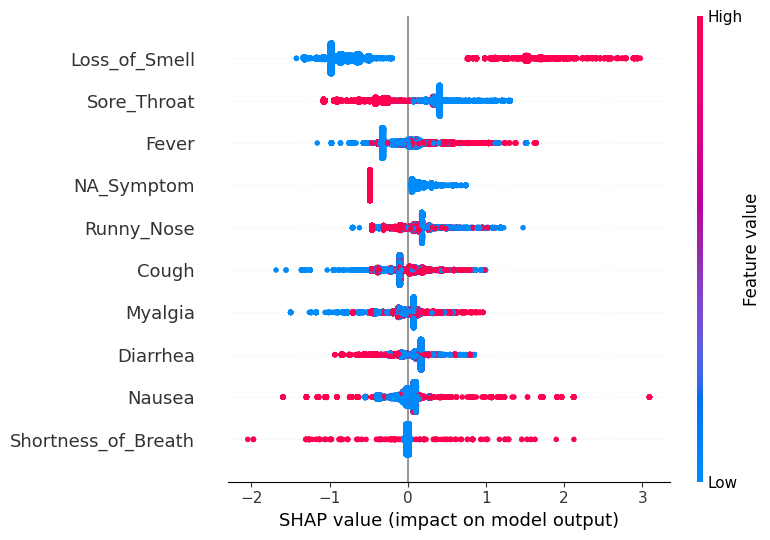


Feature importance :  [0.2618715  0.19970842 0.4373241  0.22008938 0.18072636 0.15154089
 0.17598292 1.017543   0.02236845 0.23756388]


<Figure size 640x480 with 0 Axes>

In [18]:
#Imp_shap_xgb = SHAP(clf_xgb, X_test_xgb, features)

print("---------------SHAP--------------------")
    
explainer = shap.TreeExplainer(clf_xgb)

shap_values = explainer.shap_values(X_test_xgb)

shap.summary_plot(shap_values, X_test_xgb, feature_names = features)
plt.figure()
print()
Imp_shap_xgb = np.mean(np.abs(shap_values), axis=0)
print('Feature importance : ', Imp_shap_xgb)


### LIME



---------------LIME--------------------



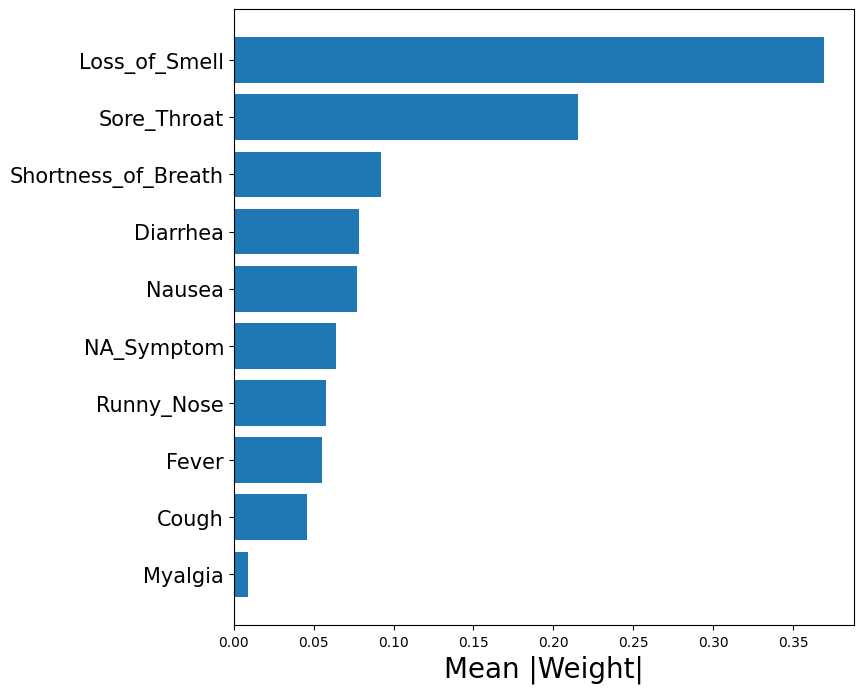

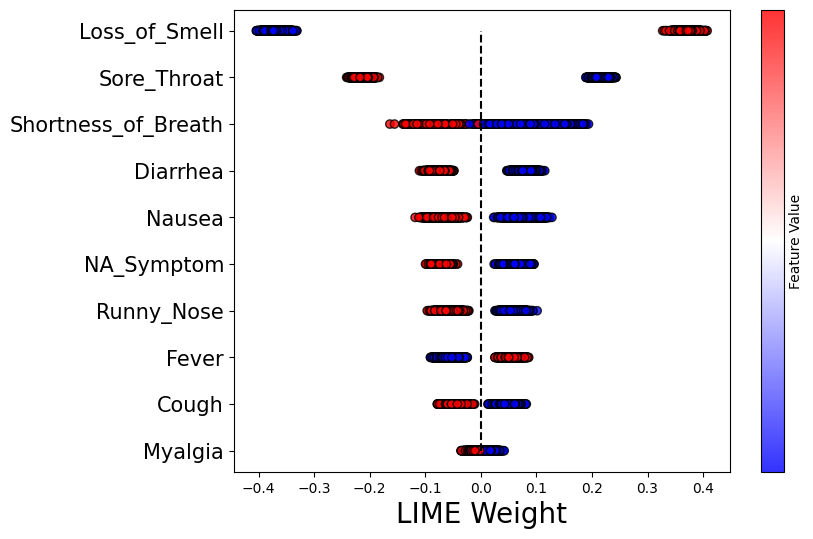

In [20]:
LIME(clf_xgb, X_train_xgb,symptom_columns,X)

Curva ROC

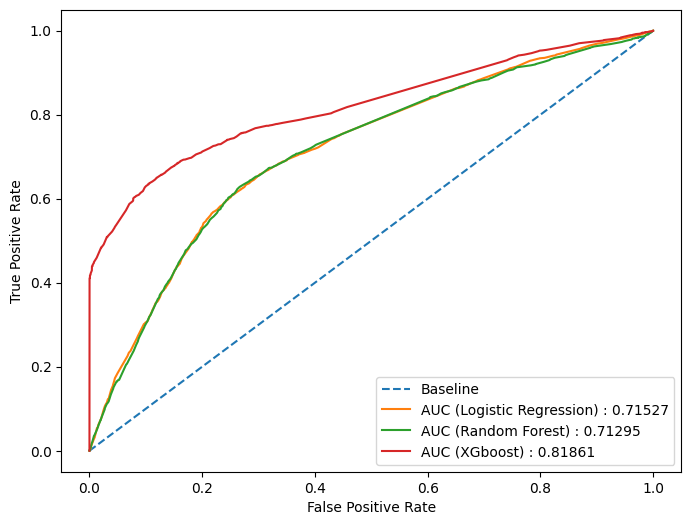

In [27]:
baseline = [0 for _ in range(len(y_test_LR))]

lr_probs = clf_LR.predict_proba(X_test_LR)
rf_probs = clf_RF.predict_proba(X_test_RF)
xgb_probs = clf_xgb.predict_proba(X_test_xgb)

# keeping probabilities for positive output only
lr_probs_pos = lr_probs[:, 1]
rf_probs_pos = rf_probs[:, 1]
xgb_probs_pos = xgb_probs[:, 1]

base_fpr, base_tpr, _ = roc_curve(y_test_LR, baseline)
lr_fpr, lr_tpr, _ = roc_curve(y_test_LR, lr_probs_pos)
rf_fpr, rf_tpr, _ = roc_curve(y_test_RF, rf_probs_pos)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_xgb, xgb_probs_pos)

plt.figure(figsize=(8, 6))

plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='AUC (Logistic Regression) : {:.5f}'.format(roc_auc_score(y_test_LR, lr_probs_pos)))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='AUC (Random Forest) : {:.5f}'.format(roc_auc_score(y_test_RF, rf_probs_pos)))
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='AUC (XGboost) : {:.5f}'.format(roc_auc_score(y_test_xgb, xgb_probs_pos)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

### Comparing the importance

In [28]:
odds_ratio_ML = list(odds_ratio_ML)
df = pd.DataFrame(odds_ratio_ML, index = data.iloc[:,0:10].columns, columns=['Odds_Ratio'])
odds_ratio_ML = list(odds_ratio_ML)
df['Feature importance XGBClassifier'] = Imp_shap_xgb
df['Feature importance Random Forest'] = Imp_shap_RF

scaler_minMax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minMax.fit_transform(df),columns = df.columns,index = data.iloc[:,0:10].columns)

df_normalized = np.round(df_normalized,3)
#df_normalized
df_normalized.sort_values(by = 'Odds_Ratio', ascending = False)
display(df_normalized)
'''
df_normalized['Dif (Random Forest - XGBClassifier)']=df_normalized['Feature importance Random Forest']- df_normalized['Feature importance XGBClassifier']
df_normalized['Dif (Od  - XGBClassifier)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance XGBClassifier']
df_normalized['Dif (Od  - Random Forest)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance Random Forest']
df_normalized = df_normalized.iloc[:,3:6]

df_normalized['Dif (Random Forest - XGBClassifier)'] = np.round(df_normalized['Dif (Random Forest - XGBClassifier)'],3)
df_normalized['Dif (Od  - XGBClassifier)'] = np.round(df_normalized['Dif (Od  - XGBClassifier)'],3)
df_normalized['Dif (Od  - Random Forest)'] = np.round(df_normalized['Dif (Od  - Random Forest)'],3)
df_normalized
'''

#correlation = df_normalized.corr()
#plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
#plot

,Odds_Ratio,Feature importance XGBClassifier,Feature importance Random Forest
Fever,0.316,0.241,0.415
Cough,0.187,0.178,0.193
Sore_Throat,0.000,0.417,0.250
Runny_Nose,0.049,0.199,0.140
Myalgia,0.200,0.159,0.211
Nausea,0.134,0.130,0.038
Diarrhea,0.093,0.154,0.049
Loss_of_Smell,1.000,1.000,1.000
Shortness_of_Breath,0.260,0.000,0.000
NA_Symptom,0.165,0.216,0.023


"\ndf_normalized['Dif (Random Forest - XGBClassifier)']=df_normalized['Feature importance Random Forest']- df_normalized['Feature importance XGBClassifier']\ndf_normalized['Dif (Od  - XGBClassifier)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance XGBClassifier']\ndf_normalized['Dif (Od  - Random Forest)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance Random Forest']\ndf_normalized = df_normalized.iloc[:,3:6]\n\ndf_normalized['Dif (Random Forest - XGBClassifier)'] = np.round(df_normalized['Dif (Random Forest - XGBClassifier)'],3)\ndf_normalized['Dif (Od  - XGBClassifier)'] = np.round(df_normalized['Dif (Od  - XGBClassifier)'],3)\ndf_normalized['Dif (Od  - Random Forest)'] = np.round(df_normalized['Dif (Od  - Random Forest)'],3)\ndf_normalized\n"